<h3> LAB 5 - Amostragem DFT</h3>
<h5> Processamento Digital de Sinais II - TE912 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [76]:
# Inicializa os pacotes que serão utilizados
from pylab import *

<b>a) Crie um vetor a, cossenoide com 8 ciclos completos, 64 amostras.</b>

In [105]:
n = arange(64)
f = 8/63
w_n = 2*pi*f

a = cos(n*w_n)

<b>b) Crie o vetor b, janela retangular de 64 amostras (32 valores unitários e 32 valores zeros).</b>

In [104]:
b = np.concatenate((ones(32), zeros(32)), axis=None)

<b>c) Obtenha o vetor c, o produto do vetor a e vetor b.</b>

In [103]:
c = a*b

<b>d) Obtenha o vetor d, como sendo as primeiras 32 amostras do vetor a (portanto 4 ciclos completos). Plote os 4 sinais no mesmo gráfico.</b>

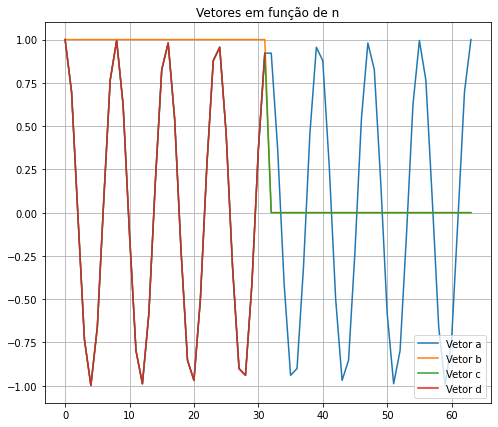

In [113]:
d = a[:32]

# Imprime todos os sinais no mesmo gráfico
figure(figsize=(8,7))
grid()
plot(n,a,n,b,n,c,n[:32],d)
title('Vetores em função de n')
legend(['Vetor a','Vetor b','Vetor c','Vetor d'])
show()

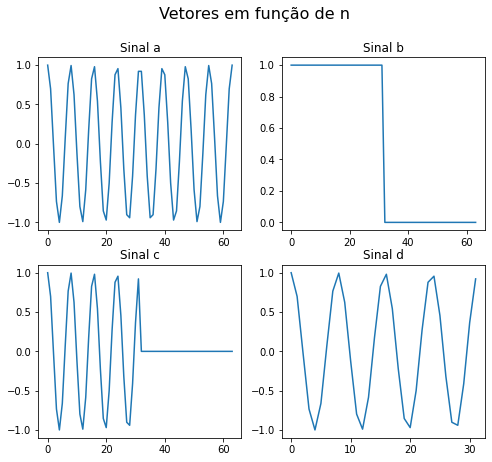

In [117]:
# Imprime os sinais em subplots para facilitar a visualização de cada um
fig, axarr = subplots(2, 2, figsize=(8,7))
fig.suptitle("Vetores em função de n", fontsize=16)
# Plota os sinais do primeiro gráfico
axarr[0,0].plot(n,a)
axarr[0,0].set_title('Sinal a')
# Plota os sinais do segundo gráfico
axarr[0,1].plot(n,b)
axarr[0,1].set_title('Sinal b')
# Plota os sinais do terceiro gráfico
axarr[1,0].plot(n,c)
axarr[1,0].set_title('Sinal c')
# Plota os sinais do quarto gráfico
axarr[1,1].plot(n[:32],d)
axarr[1,1].set_title('Sinal d')
show()

<b>e) Plote o valor absoluto da DFT (FFT) dos sinais em outro gráfico, de forma que todos fiquem na mesma escala.</b>

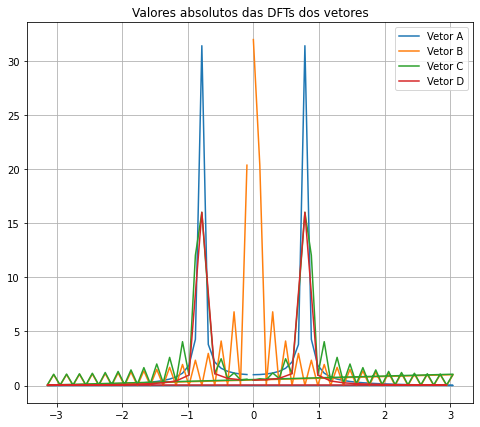

In [118]:
# Valores absolutos das DFTs de cada um dos sinais
A = abs(fft(a))
B = abs(fft(b))
C = abs(fft(c))
D = abs(fft(d))

# Vetor de frequências para sinais de tamanho 64 (a,b e c)
w = fftfreq(len(n))*2*pi
# Vetor de frequências para o sinal d de tamanho 32
w_d = fftfreq(len(d))*2*pi

# Imprime o gráfico
figure(figsize=(8,7))
grid()
plot(w,A,w,B,w,C,w_d,D)
title('Valores absolutos das DFTs dos vetores')
legend(['Vetor A','Vetor B','Vetor C','Vetor D'])
show()

<b>f) Comente o resultado.</b>

A DFT do vetor a apresenta dois impulsos de amplitude 31 em aproximadamente mais ou menos 0.8 rad devido a frequência w_n usada para gerar este sinal. Os impulsos no gráfico não estão bem definidos e não apresentam amplitude de 32 provavelmente pela posição da frequência natural do sinal (w_n) não corresponder precisamente a um bin do vetor w. A amplitude de 32 era esperada por corresponder a metade do comprimento do vetor $a$.

O vetor $b$ apresenta como comportamento na frequência um sinal equivalente a um sinc levantado, conforme o esperado para um sinal de onda retangular. A amplitude no pico central é de 32 pois este corresponde a metade do comprimento deste vetor. Observa-se que os lóbulos da DFT se estendem indeterminadamente, o que também corresponde a uma sinc, demonstrando o porquê desta janela não ser utilizada na prática. 

O vetor $c$ é a multiplicação dos vetores $a$ e $b$ no tempo discreto, e assim, na frequência corresponde a convolução da DFT dos vetores $A$ e $B$. Assim, vemos que a DFT de $c$ apresenta o formato de $B$, porém com picos espelhados e deslocados na frequência natural de $A$. A amplitude de cada um destes picos principais corresponde a metade do pico original da envoltória da janela. Este comportamento está conforme o esperado, uma vez que respeita o teorema da modulação.

O vetor $d$ corresponde na frequência a um par de pulsos, similarmente a $a$. Estes pulsos se localizam na mesma frequência natural de $a$, uma vez que $d$ é basicamente este vetor, porém observado em uma janela mais estreita. Apesar dos sinais serem teoricamente os mesmos, vemos que $D$ não é exatamente igual a $A$. Isto porque a janela menor resulta em perda de informação e resolução do sinal original. É possível supor ainda que caso este sinal fosse então modulado por uma janela retangular, sua amplitude seria ainda mais atenuada.

Por fim, a linha cortando a base de $B$ e $C$ provavelmente se dá pela interpolação que o comando plot() realizou na transição entre o nível 1 e o 0 na janela retangular do vetor $b$.